# Exploring and Visualizing Data

## DEEP Workshop #3
The goal of this notebook is to give you exposure to basic visualizing tools in python.

### Table of contents: 
1. Reading in Data
2. Getting an Initial Sense for the Data
3. Basic Plotting
4. 1D Plotting
5. Common Initial Plots
6. Heat Maps and correlation

### Data Overview 
You can either walk through this using your own data set or the pokemon data set. Either will work and its completely up to you.
  

# Reading in Data

Just like last week before we begin working we need to import our libraries and read in the data.
```
import library_name as some_abbreviation
```
This weeks imports will be:
```
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
```

Usually to read in data we just use:
```
df = pd.read_csv('path or url to csv')
```

This week the format of the data is a bit unique so we will use: 
```
df = pd.read_csv('path or url to csv', index_col=0, encoding = "ISO-8859-1")
```

In [3]:
# import libraries 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# import your data 
df = pd.read_csv('2012-18_officialBoxScore.csv')

# Getting an Initial Sense for the Data 

Although we will be focusing on data viz this week we still need to get a basic understanding of the data we are 
working with. Using functions we learned last week try to solve the below problems. 

***If you can't remember how to do something try googling it. You will usually find what you need with "pandas how to..."***

### Q: What are the dimensions/shape of the dataset?

In [10]:
df.shape
#(44284, 119)

(44284, 119)

### Q: What are each of the columns of the dataset?

In [13]:
print(df.dtypes)
print()
print(df.info)

gmDate         object
gmTime         object
seasTyp        object
offLNm         object
offFNm         object
               ...   
opptAR        float64
opptAST/TO    float64
opptSTL/TO    float64
poss          float64
pace          float64
Length: 119, dtype: object

<bound method DataFrame.info of            gmDate gmTime  seasTyp  ... opptSTL/TO     poss     pace
0      2012-10-30  19:00  Regular  ...    33.3333  88.9409  88.9409
1      2012-10-30  19:00  Regular  ...    33.3333  88.9409  88.9409
2      2012-10-30  19:00  Regular  ...    33.3333  88.9409  88.9409
3      2012-10-30  19:00  Regular  ...    84.6154  88.9409  88.9409
4      2012-10-30  19:00  Regular  ...    84.6154  88.9409  88.9409
...           ...    ...      ...  ...        ...      ...      ...
44279  2018-04-11  10:30  Regular  ...    54.5455  91.9864  91.6047
44280  2018-04-11  10:30  Regular  ...    54.5455  91.9864  91.6047
44281  2018-04-11  10:30  Regular  ...    14.2857  91.9864  91.9864
44282  2018-04-11 

### Q: For each column determine if its nominal, ordinal, or continuous and why

In [14]:
# too many columns to determine for each one

### Q: Is there anything strange that initially catches your eye about this data set? (Fine if not)

# Basic Plotting 

To begin most plots you will want to specify a size:
```
plt.figure(figsize=(10,7))
```

Then you will want to create the actual plot:
```
chart = sns.scatterplot(x="col1", y="col2", data=df)
```

The general pattern for seaborn is sns.name_of_a_plot_type(kwargs)

You then add extra details such as a title:
```
plt.title("Title")
```

If you ever want to create or add things but dont know how google it! Using just specify your trying to 
create the visual with matplotlib or seaborn

### Q: Choose any two continuous columns create a scatter plot of the two
### Q: Are these two variables in a linear or non linear relationship?
### Q: Are there any outliers or multiple clusters?



Text(0.5, 1.0, 'Title')

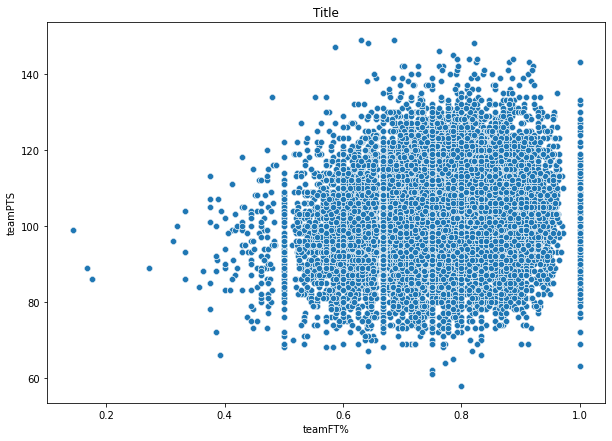

In [25]:
plt.figure(figsize=(10,7))
chart = sns.scatterplot(x="teamFT%", y="teamPTS", data=df)
plt.title("Title")

# 1D Ploting

There are many types of 1D plots:
bar plot, histogram, radial bar char, swarm plot, boxplot

To create a bar plot based on a nominal or ordinal:
```
df["col"].value_counts().plot(kind='bar')
```

To create a histogram:
```
df[’col’].hist(bins=10)
```


### Q: Choose a nominal or ordinal columnn create a bar plot of it

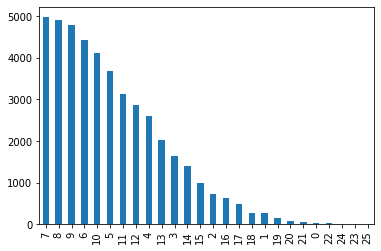

In [30]:
df["team3PM"].value_counts().plot(kind='bar')

### Q: Choose a continuous column create a histogram of it

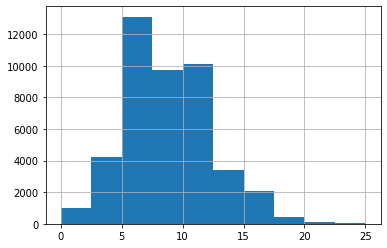

In [43]:
df['team3PM'].hist(bins=10)

# Common Initial Plots

### Pair Plot

A quick way to see all one on one relationships of continuous variables is using a pair plot. You may first need to create a df with only cont. variables in it for the function to work. 
```
chart = sns.pairplot(data=df)
```

You can layer another dimension of data in a pairplot by specify the hue to be equal to a column with a small number of possible values
```
chart = sns.pairplot(data=df, hue="nominal_col or ordinal_col")
```

### Box Plot

Box plots show the quartile distibrution of a data set (25th percentile, median, 75 percentile) and any outliers.
```
plt.figure(figsize=(10,5))
chart = sns.boxplot(y="cont_col", data=df)
```

For this plot we can also display multiple dimensions of data by specifying x to equal a variable with a small number of possible values
```
plt.figure(figsize=(10,5))
chart = sns.boxplot(x="nominal_col or ordinal", y="cont_col", data=df)
```



### Create a pairplot of your data
### What relationships can you see? Is there anything that stands out?

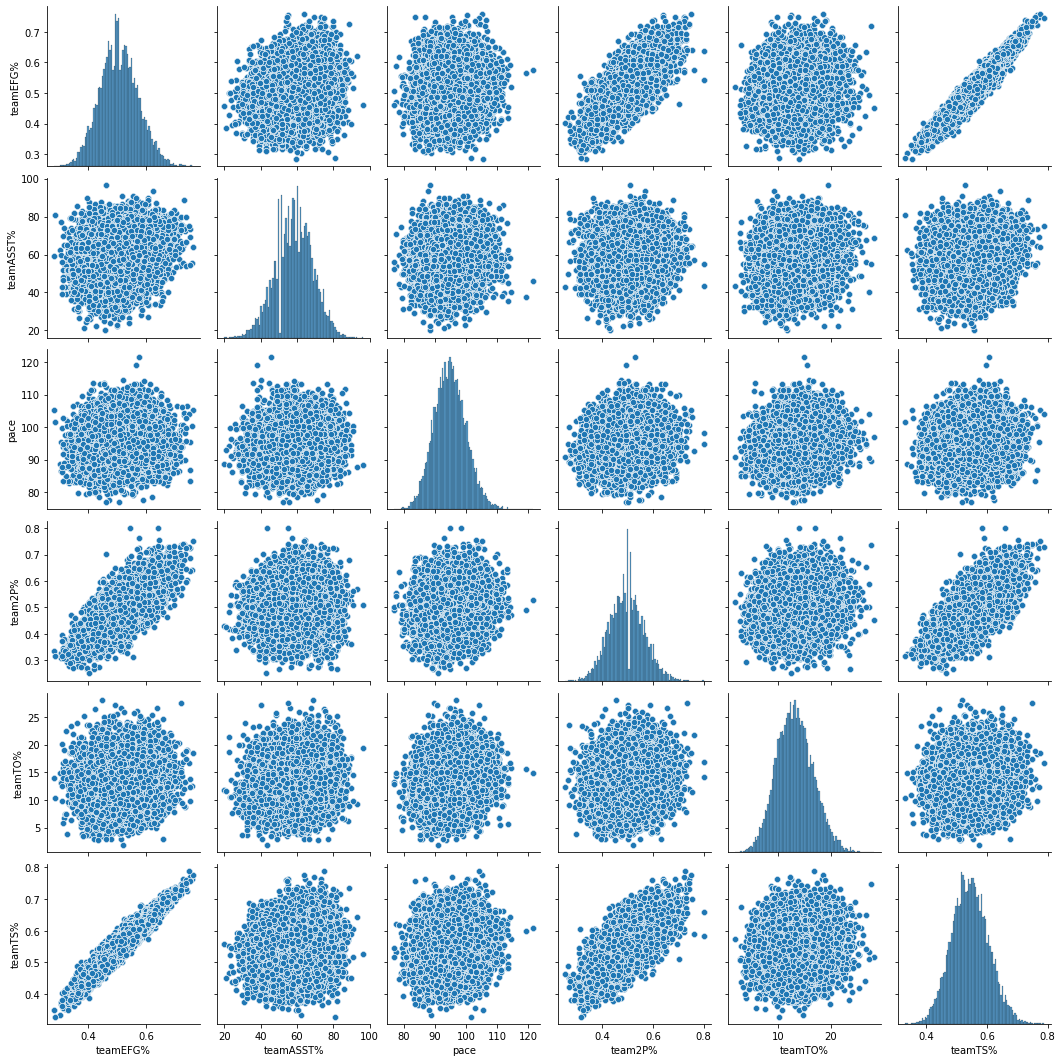

In [45]:
#data to big to make a pairplot for every column
#so lets create a subset
df2 = df[["teamEFG%", "teamASST%", "pace", "team2P%", "teamTO%", "teamTS%"]]
chart = sns.pairplot(data=df2)

### Choose a nominal or ordinal col to use. Recreate your pair plot while coloring by that variable
### How does it change your understanding?

In [1]:
chart = sns.pairplot(data=df2, hue="nominal_col or ordinal_col")

### Repeat above for box plots

In [ ]:
plt.figure(figsize=(10,5))
chart = sns.boxplot(x="nominal_col or ordinal", y="cont_col", data=df2)

# Heat Map and Correlation

One useful data viz you can make before modeling is a correlation heat map. This graphic allows you to see the correlation coefficient from each pair of variables.
```
chart = sns.heatmap(df.corr(), center=0, annot=True, vmin=-1, vmax=1)
```

### Create a heat map of the correlation of your data

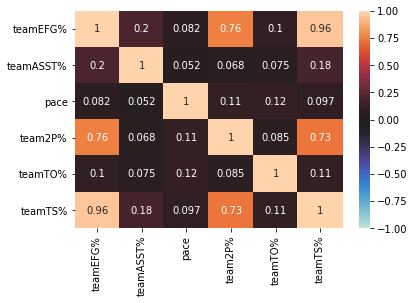

In [6]:
df2 = df[["teamEFG%", "teamASST%", "pace", "team2P%", "teamTO%", "teamTS%"]]
chart = sns.heatmap(df2.corr(), center=0, annot=True, vmin=-1, vmax=1)

### Do the values roughly line up with the linearity seen in the pair plot viz?

In [ ]:
# yes!

# Next Steps

Keep digging into your data set and answering questions through viz. This should lead to more questions.